In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, December 15, 2018.

## Time Series Challenge Guidelines

1) Plot the time series, along with any logical or necessary differences to get a stationary dataset

2) Generate and interpret a PACF for the time series (and/or its differences)

3) Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

4) Finally choose one specification and make the case for that as a logical model for your dataset.

In [2]:
cpi_data = pd.read_csv('CPIAUCSL.csv')

# Remove NA's
cpi_data.dropna(inplace=True)

In [3]:
cpi_data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [4]:
cpi_data.shape

(863, 2)

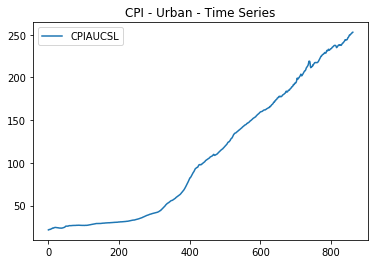

In [5]:
cpi_data.plot()
plt.title('CPI - Urban - Time Series')
plt.show()

In [6]:
# Use Pandas to create date based index

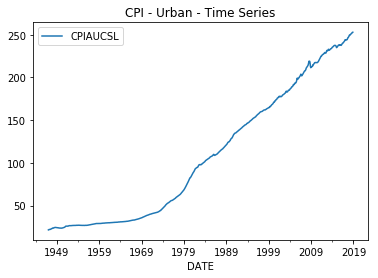

In [7]:
cpi_data.index = pd.to_datetime(cpi_data.DATE)
cpi_data.plot()
plt.title('CPI - Urban - Time Series')
plt.show()

The Consumer Price Index for Urban Consumers increased sharply for the past 50 years.

In [8]:
# Plotting the difference

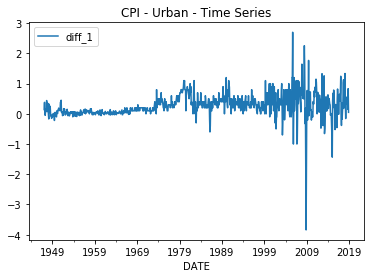

In [9]:
cpi_data['diff_1'] = cpi_data['CPIAUCSL'] - cpi_data['CPIAUCSL'].shift(periods=1)
cpi_data.plot(y='diff_1')
plt.title('CPI - Urban - Time Series')
plt.show()

In [10]:
# Plotting the PACF

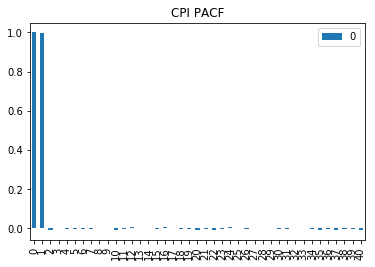

In [11]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(cpi_data['CPIAUCSL']))
x_acf.plot(kind='bar')
plt.title("CPI PACF")
plt.show()

The PACF shows one high autocorrelation.

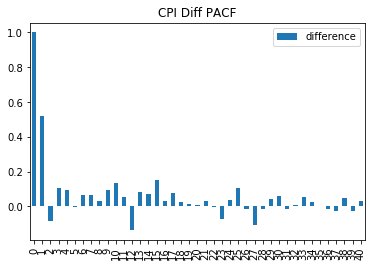

In [12]:
x_acf = pd.DataFrame(pacf(cpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("CPI Diff PACF")
plt.legend(['difference'])
plt.show()

The CPI Diff PACF's highest correlation is lower than the original PACF's highest autocorrelation.  The CPI Diff PACF's remaining autocorrelations are higher than the original PACF's remaining autocorrelations.

In [13]:
# Build series of models to evaluate.  Parameters are passed in
# (p,d,q) order, corresponding to AR, I, and MA portions in ARIMA.

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  862
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -407.797
Method:                           css   S.D. of innovations              0.388
Date:                Tue, 15 Jan 2019   AIC                            819.594
Time:                        22:37:20   BIC                            829.113
Sample:                    02-01-1947   HQIC                           823.238
                         - 11-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2684      0.013     20.295      0.000       0.243       0.294
Residuals Description
count    8.620000e+02
mean     6.367942e-09
std      3.885725e-01
min     -4.110441e+00
25%     -2.084408e-01

Text(0.5,1,'0,1,0 Histogram of Residuals')

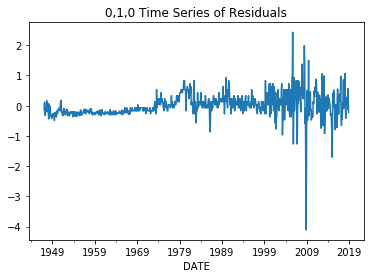

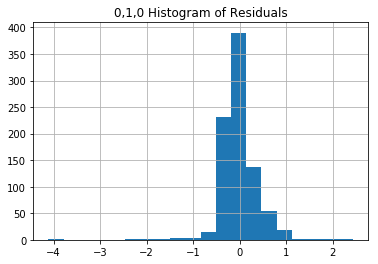

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(cpi_data['CPIAUCSL'], order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

residuals_010 = pd.DataFrame(model_010_fit.resid)

residuals_010.plot(legend=False)
plt.title('0,1,0 Time Series of Residuals')

residuals_010.hist(bins=20)
plt.title('0,1,0 Histogram of Residuals')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350:

                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  863
Model:                     ARMA(1, 0)   Log Likelihood                -585.153
Method:                       css-mle   S.D. of innovations              0.472
Date:                Tue, 15 Jan 2019   AIC                           1176.307
Time:                        22:37:21   BIC                           1190.588
Sample:                    01-01-1947   HQIC                          1181.773
                         - 11-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            108.6182        nan        nan        nan         nan         nan
ar.L1.CPIAUCSL     1.0000        nan        nan        nan         nan         nan
                                    

Text(0.5,1,'1,0,0 Histogram of Residuals')

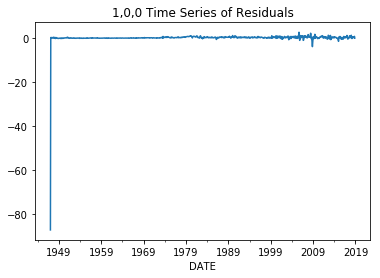

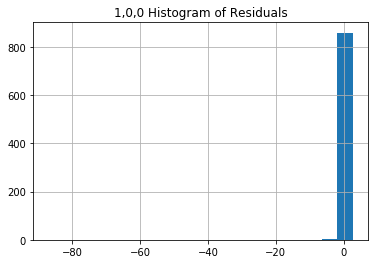

In [15]:
model_100 = ARIMA(cpi_data['CPIAUCSL'], order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

residuals_100 = pd.DataFrame(model_100_fit.resid)

residuals_100.plot(legend=False)
plt.title('1,0,0 Time Series of Residuals')

residuals_100.hist(bins=20)
plt.title('1,0,0 Histogram of Residuals')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  863
Model:                     ARMA(0, 1)   Log Likelihood               -4370.535
Method:                       css-mle   S.D. of innovations             38.149
Date:                Tue, 15 Jan 2019   AIC                           8747.069
Time:                        22:37:23   BIC                           8761.351
Sample:                    01-01-1947   HQIC                          8752.536
                         - 11-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            107.9506      2.596     41.588      0.000     102.863     113.038
ma.L1.CPIAUCSL     1.0000      0.003    339.588      0.000       0.994       1.006
                                    

Text(0.5,1,'0,0,1 Histogram of Residuals')

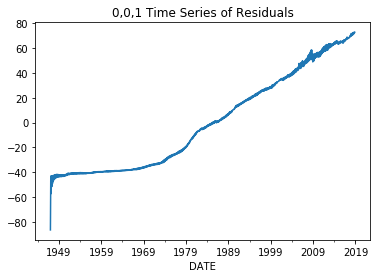

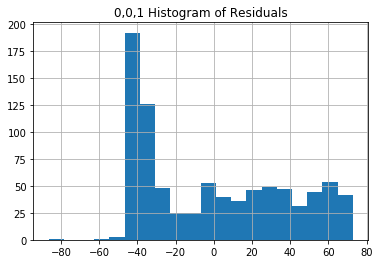

In [16]:
model_001 = ARIMA(cpi_data['CPIAUCSL'], order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('Residuals Description')
print(model_001_fit.resid.describe())

residuals_001 = pd.DataFrame(model_001_fit.resid)

residuals_001.plot(legend=False)
plt.title('0,0,1 Time Series of Residuals')

residuals_001.hist(bins=20)
plt.title('0,0,1 Histogram of Residuals')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -266.847
Method:                       css-mle   S.D. of innovations              0.330
Date:                Tue, 15 Jan 2019   AIC                            541.694
Time:                        22:37:24   BIC                            560.731
Sample:                    02-01-1947   HQIC                           548.981
                         - 11-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2679      0.022     12.445      0.000       0.226       0.310
ar.L1.D.CPIAUCSL     0.3713      0.061      6.135      0.000       0.253       0.490
ma.L1.D.CPIAUCSL     0.2063 

Text(0.5,1,'Histogram of Residuals')

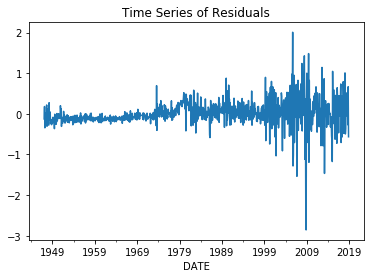

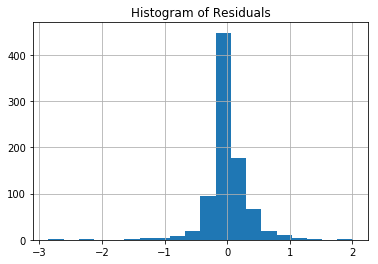

In [17]:
model_111 = ARIMA(cpi_data['CPIAUCSL'], order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

residuals_111 = pd.DataFrame(model_111_fit.resid)

residuals_111.plot(legend=False)
plt.title('Time Series of Residuals')

residuals_111.hist(bins=20)
plt.title('Histogram of Residuals')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  862
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -244.871
Method:                       css-mle   S.D. of innovations              0.321
Date:                Tue, 15 Jan 2019   AIC                            501.741
Time:                        22:37:26   BIC                            530.297
Sample:                    02-01-1947   HQIC                           512.672
                         - 11-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2553      0.091      2.805      0.005       0.077       0.434
ar.L1.D.CPIAUCSL     1.1778      0.069     16.976      0.000       1.042       1.314
ar.L2.D.CPIAUCSL    -0.1821 

Text(0.5,1,'2,1,2 Histogram of Residuals')

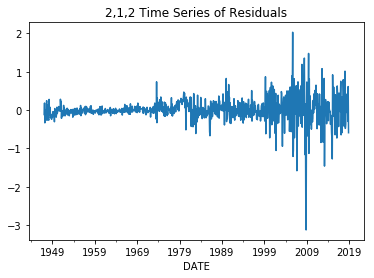

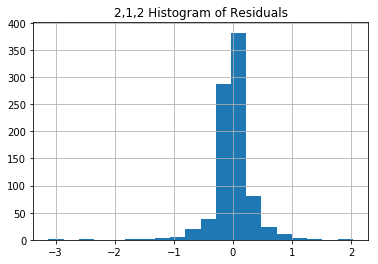

In [18]:
model_212 = ARIMA(cpi_data['CPIAUCSL'], order=(2,1,2))
model_212_fit = model_212.fit()
print(model_212_fit.summary())
print('Residuals Description')
print(model_212_fit.resid.describe())

residuals_212 = pd.DataFrame(model_212_fit.resid)

residuals_212.plot(legend=False)
plt.title('2,1,2 Time Series of Residuals')

residuals_212.hist(bins=20)
plt.title('2,1,2 Histogram of Residuals')

### Models to Use
**(0,1,0)**, **(1,1,1)**, & **(2,1,2)** are random and normally distributed.

### AIC Summary

(0,1,0) - AIC = 819.594

(1,1,1) - AIC = 541.694

(2,1,2) - AIC = 501.741

Since (2,1,2) had the lowest AIC value, we will use that as our AICmin value in the context of information loss.

In [19]:
AIC010 = 819.594
AIC111 = 541.694
AIC212 = 501.741

loss_111 = np.exp((AIC212 - AIC111) / 2)
print(loss_111)

loss_010 = np.exp((AIC212 - AIC010) / 2)
print(loss_010)

2.110164353157933e-09
9.530112377632101e-70


Both (1,1,1) and (0,1,0) have very low probabilities that we lost less information, so (2,1,2) should be our best choice.